In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# **Remarks**

***Name:*** Yashaswi Sharma

***UID:*** 116245821

***Link for File:*** **https://colab.research.google.com/drive/1VJG45sRDrApyhT7pr4Q0RPQDHZvoSjbD?usp=sharing**

I am sharing this file because at times google colab has image formatting issues. Hence, with access to this link if there are any images that are misplaced or half presented, the grader will have full and ready access to the actual image.

# **2D**

## **1)**

In 2D,  you are given data for a polygon.  The edges have these outward normal vectors  

$U_1 =  \begin{bmatrix}0.951057 & 0.587785 & -0.587785 & -0.951057 & 0. \\ -0.309017 & 0.809017 & 0.809017 & -0.309017 & -1\end{bmatrix}$

and the edges all satisfy 

$n \cdot p <= 0.809017$

Find the vertices of the polygon and make a picture.   What shape is this?

Use the inequalities to decide if q = {-.2, -.9} is in the polygon?

In [ ]:
U1 = np.array([[0.951057, -0.309017], [0.587785, 0.809017], [-0.587785, 0.809017], [-0.951057, -0.309017], [0., -1.]])
print(U1.T)

[[ 0.951057  0.587785 -0.587785 -0.951057  0.      ]
 [-0.309017  0.809017  0.809017 -0.309017 -1.      ]]


We know that for every edge $\vec{d_i}$ the outward normal vector $\vec{n_i} \in  U_1$ will have the product: $\vec{d_i} \cdot \vec{n_i} = 0$ assuming there is no bias that we have. 

As stated above, we are putting in a bias of 0.809017 as any point tested against one of the vectors $\vec{n_i} \in  U_1$ can be tested to see if it is less than that value.

Hence if we derive the extension of this: $n_{i,1} * d_{i,1} + n_{i,2} * d_{i,2} = 0.809017$ and solve that down to:

$d_{i,2} = \frac{0.809017 - n_{i,1} * d_{i,1}}{n_{i,2}}$

In our x-y plane, we can rewrite this as:

$y = \frac{0.809017 - n_{i,1} * x}{n_{i,2}}$

### **Drawing the Shape**

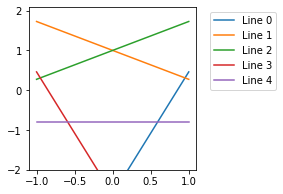

In [ ]:
x = np.linspace(-1, 1)
y0 = (0.809017 - U1[0][0] * x)/U1[0][1]
y1 = (0.809017 - U1[1][0] * x)/U1[1][1]
y2 = (0.809017 - U1[2][0] * x)/U1[2][1]
y3 = (0.809017 - U1[3][0] * x)/U1[3][1]
y4 = (0.809017 - U1[4][0] * x)/U1[4][1]

y = [y0,y1,y2,y3,y4]
plt.figure(figsize=(3,3))
for i in range(len(y)):
  plt.plot(x, y[i], label='Line {}'.format(i))
ymin, ymax = plt.ylim()
plt.ylim(-2, ymax)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

The shape looks like a **Pentagon**.

### **Determining the Vertices**

From our shape above, we know which adjacent hyperplanes produce our vertices. Hence, we can greedily use that to determine our 5 vertices

In [ ]:
b = np.ones(2) * 0.809017
A1 = np.array([U1[1], U1[2]])
v1 = np.linalg.solve(A1, b)
print('Top Vertex is {}'.format(v1))

A2 = np.array([U1[0], U1[1]])
v2 = np.linalg.solve(A2, b)
print('Top Right Vertex is {}'.format(v2))

A3 = np.array([U1[0], U1[4]])
v3 = np.linalg.solve(A3, b)
print('Bottom Right Vertex is {}'.format(v3))

A4 = np.array([U1[3], U1[4]])
v4 = np.linalg.solve(A4, b)
print('Bottom Left Vertex is {}'.format(v4))

A5 = np.array([U1[2], U1[3]])
v5 = np.linalg.solve(A5, b)
print('Top Left Vertex is {}'.format(v5))

Top Vertex is [0. 1.]
Top Right Vertex is [0.95105621 0.30901752]
Bottom Right Vertex is [ 0.58778495 -0.809017  ]
Bottom Left Vertex is [-0.58778495 -0.809017  ]
Top Left Vertex is [-0.95105621  0.30901752]


Hence our final vertices for the face are:

In [ ]:
vs = [v1, v2, v3, v4, v5]
for v in vs:
  print(v)

[0. 1.]
[0.95105621 0.30901752]
[ 0.58778495 -0.809017  ]
[-0.58778495 -0.809017  ]
[-0.95105621  0.30901752]


### **Determining whether $(-0.2,-0.9)$ belongs in the polygon**

In [ ]:
pt = np.array([-0.2,-0.9])
notin = False
for vec in U1:
  if pt.dot(vec) > 0.809017:
    notin = True
if notin:
  print('Does not belong in Polygon =(')
else:
  print('Is inside Polygon =)')

Does not belong in Polygon =(


As per the above output, the point = (-0.2,-0.9) is not inside the polygon defined by our normalized vectors.

## **2)**

In 2D,  you are given data for a polygon with one less edge than the previous figure.  The edges have these outward normal vectors  

$U2 = \{ \begin{pmatrix}0.951057 \\ -0.309017 \end{pmatrix}, \begin{pmatrix} 0.587785 \\ 0.809017 \end{pmatrix}, \begin{pmatrix} -0.587785 \\   0.809017 \end{pmatrix}, \begin{pmatrix}-0.951057 \\ -0.309017\end{pmatrix}\}$

and the edges all satisfy 

$n \cdot p <= 0.809017$

Find the vertices of the polygon and make a picture.  What shape is this?

Use the inequalities to decide if q = {-.2, -.9} is in the polygon?

In [ ]:
U2 = np.array([[0.951057, -0.309017], [0.587785, 0.809017], [-0.587785, 0.809017], [-0.951057, -0.309017]])
print(U2.T)

[[ 0.951057  0.587785 -0.587785 -0.951057]
 [-0.309017  0.809017  0.809017 -0.309017]]


Same effective logic as above in **1**. We will draw the shape below and declare whether the point *q* belongs in the polygon.

### **Drawing the Polygon**

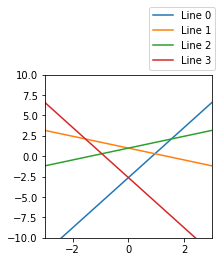

In [ ]:
x = np.linspace(-10, 10)
y0 = (0.809017 - U2[0][0] * x)/U2[0][1]
y1 = (0.809017 - U2[1][0] * x)/U2[1][1]
y2 = (0.809017 - U2[2][0] * x)/U2[2][1]
y3 = (0.809017 - U2[3][0] * x)/U2[3][1]

y = [y0,y1,y2,y3]
plt.figure(figsize=(3,3))
for i in range(len(y)):
  plt.plot(x, y[i], label='Line {}'.format(i))
plt.ylim(-10, 10)
plt.xlim(-3,3)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

The shape above looks like a **Diamond**

### **Determining the Vertices**

In [ ]:
b = np.ones(2) * 0.809017
A1 = np.array([U2[1], U2[2]])
v1 = np.linalg.solve(A1, b)
print('Top Vertex is {}'.format(v1))

A2 = np.array([U2[0], U2[1]])
v2 = np.linalg.solve(A2, b)
print('Right Vertex is {}'.format(v2))

A3 = np.array([U2[0], U2[3]])
v3 = np.linalg.solve(A3, b)
print('Bottom Vertex is {}'.format(v3))

A4 = np.array([U2[2], U2[3]])
v4 = np.linalg.solve(A4, b)
print('Left Vertex is {}'.format(v4))

Top Vertex is [0. 1.]
Right Vertex is [0.95105621 0.30901752]
Bottom Vertex is [ 4.43327384e-17 -2.61803396e+00]
Left Vertex is [-0.95105621  0.30901752]


Hence our final vertices for the Diamond/Kite are:

In [ ]:
vs = [v1, v2, v3, v4]
for v in vs:
  print(v)

[0. 1.]
[0.95105621 0.30901752]
[ 4.43327384e-17 -2.61803396e+00]
[-0.95105621  0.30901752]


### **Determining whether $(-0.2,-0.9)$ belongs in the polygon**

In [ ]:
pt = np.array([-0.2,-0.9])
notin = False
for vec in U2:
  if pt.dot(vec) > 0.809017:
    notin = True
if notin:
  print('Does not belong in Polygon =(')
else:
  print('Is inside Polygon =)')

Is inside Polygon =)


As per the above output, the point = (-0.2,-0.9) is inside the polygon defined by our normalized vectors.

## **3)**

In 2D,  you are given data for a region with one less edge than the previous figure.  The edges have these outward normal vectors  

$ U3 =  \{\begin{pmatrix} 0.951057 \\ -0.309017 \end{pmatrix}, \begin{pmatrix} 0.587785 \\ 0.809017 \end{pmatrix}, \begin{pmatrix} -0.587785 \\ 0.809017\end{pmatrix}\} $

and the edges all satisfy 

$n \cdot p <= 0.809017$

Find the vertices of the region and make a picture.  What shape is this?

Use the inequalities to decide if q = {-.2, -.9} is in the polygon?



In [ ]:
U3 = np.array([[0.951057, -0.309017], [0.587785, 0.809017], [-0.587785, 0.809017]])
print(U3.T)

[[ 0.951057  0.587785 -0.587785]
 [-0.309017  0.809017  0.809017]]


### **Drawing the Shape**

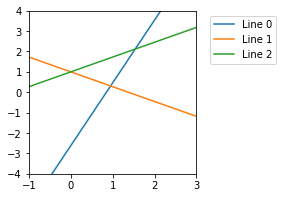

In [ ]:
x = np.linspace(-10, 10)
y0 = (0.809017 - U3[0][0] * x)/U3[0][1]
y1 = (0.809017 - U3[1][0] * x)/U3[1][1]
y2 = (0.809017 - U3[2][0] * x)/U3[2][1]

y = [y0,y1,y2]
plt.figure(figsize=(3,3))
for i in range(len(y)):
  plt.plot(x, y[i], label='Line {}'.format(i))
plt.ylim(-4, 4)
plt.xlim(-1,3)
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

The shape above looks like a **Traingle**

### **Determining the Vertices**

In [ ]:
b = np.ones(2) * 0.809017
A1 = np.array([U3[0], U3[2]])
v1 = np.linalg.solve(A1, b)
print('Right Vertex is {}'.format(v1))

A2 = np.array([U3[0], U3[1]])
v2 = np.linalg.solve(A2, b)
print('Bottom Vertex is {}'.format(v2))

A3 = np.array([U3[1], U3[2]])
v3 = np.linalg.solve(A3, b)
print('Left Vertex is {}'.format(v3))

Right Vertex is [1.53884056 2.11803262]
Bottom Vertex is [0.95105621 0.30901752]
Left Vertex is [0. 1.]


Hence our our final vertices of the Triangle are:

In [ ]:
vs = [v1, v2, v3]
for v in vs:
  print(v)

[1.53884056 2.11803262]
[0.95105621 0.30901752]
[0. 1.]


### **Determining whether $(-0.2,-0.9)$ belongs in the polygon**

In [ ]:
pt = np.array([-0.2,-0.9])
notin = False
for vec in U3:
  if pt.dot(vec) > 0.809017:
    notin = True
if notin:
  print('Does not belong in Polygon =(')
else:
  print('Is inside Polygon =)')

Is inside Polygon =)


As per the above output, the point = (-0.2,-0.9) is inside the polygon defined by our normalized vectors.

# **3D**

## **4)**

In 3D,  you are given data for a polyhedron.  The faces have these outward normal vectors

W =  {{0., 0., -1.}, {-0.942809, 0., 0.333333}, {0.471405, -0.816497, 0.333333}, {0.471405, 0.816497, 0.333333}} 

and the faces all satisfy 

$n \cdot p <= 0.204124$

Find the coordinates for the vertices and edges of the polyhedron and make a picture.  What shape is this?

In [ ]:
W = np.array([[0., 0., -1.], [-0.942809, 0., 0.333333], [0.471405, -0.816497, 0.333333], [0.471405, 0.816497, 0.333333]])
print(W.T)

[[ 0.       -0.942809  0.471405  0.471405]
 [ 0.        0.       -0.816497  0.816497]
 [-1.        0.333333  0.333333  0.333333]]


### **Determining the Vertices**

In [ ]:
b = np.ones(3) * 0.204124
A1 = np.array([W[0], W[1], W[2]])
v1 = np.linalg.solve(A1, b)
print('Vertex {}: {}'.format(1,v1))

A2 = np.array([W[0], W[2], W[3]])
v2 = np.linalg.solve(A2, b)
print('Vertex {}: {}'.format(2,v2))

A3 = np.array([W[0], W[1], W[3]])
v3 = np.linalg.solve(A3, b)
print('Vertex {}: {}'.format(3,v3))

A4 = np.array([W[1], W[2], W[3]])
v4 = np.linalg.solve(A4, b)
print('Vertex {}: {}'.format(4,v4))

Vertex 1: [-0.28867487 -0.49999944 -0.204124  ]
Vertex 2: [ 5.77349127e-01  2.08166562e-17 -2.04124000e-01]
Vertex 3: [-0.28867487  0.49999944 -0.204124  ]
Vertex 4: [1.19720181e-17 2.39427685e-17 6.12372612e-01]


### **Drawing the Tetrahedron**

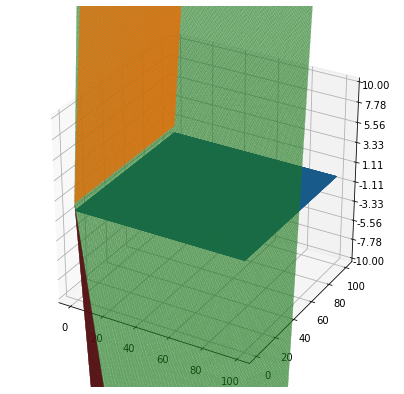

In [ ]:
b = 0.204124
x = np.linspace(0,100,1000)
y = np.linspace(0,100,1000)
x,y = np.meshgrid(x,y)
z0 = (b - W[0][0] * x - W[0][1] * y)/W[0][2]
z1 = (b - W[1][0] * x - W[1][1] * y)/W[1][2]
z2 = (b - W[2][0] * x - W[2][1] * y)/W[2][2]
z3 = (b - W[3][0] * x - W[3][1] * y)/W[3][2]

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
# ax.plot_trisurf(x, y, z0,linewidth = 0.2,antialiased = True)
# ax.plot_trisurf(x, y, z1,linewidth = 0.2,antialiased = True)
# ax.plot_trisurf(x, y, z2,linewidth = 0.2,antialiased = True)
# ax.plot_trisurf(x, y, z3,linewidth = 0.2,antialiased = True)

surf = ax.plot_surface(x, y, z0, rstride=1, cstride=1, linewidth=0, antialiased=False, alpha =.1)
surf1 = ax.plot_surface(x, y, z1, rstride=1, cstride=1, linewidth=0, antialiased=False, alpha =.1)
surf2 = ax.plot_surface(x, y, z2, rstride=1, cstride=1, linewidth=0, antialiased=False, alpha =.1)
surf3 = ax.plot_surface(x, y, z3, rstride=1, cstride=1, linewidth=0, antialiased=False, alpha =.1)

ax.set_zlim(-10, 10)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
# fig.colorbar(surf1, shrink=0.5, aspect=5)
# fig.colorbar(surf2, shrink=0.5, aspect=5)
# fig.colorbar(surf3, shrink=0.5, aspect=5)
plt.show()

Although the figure doesnt do it justice, this figure represents a ***Triangular Pyramid***

## **5)**

You are given three faces of a cuboctahedron centered at the origin. 

### **5a)**

F1 = {{-0.5, 0.5, -0.707107}, {0.5,   0.5, -0.707107}, {0.5, -0.5, -0.707107}, {-0.5, -0.5, -0.707107}}

In [ ]:
F1 = np.array([[-0.5, 0.5, -0.707107], [0.5, 0.5, -0.707107], [0.5, -0.5, -0.707107], [-0.5, -0.5, -0.707107]])

#### **5a1)**

What is n1 = the outward normal unit vector for F1?

Derived via taking 2 vectors on the existing face (can be calculated by making vectors between the vertices) and then cross producting them.

In [ ]:
vec1 = F1[0] - F1[1]
vec2 = F1[2] - F1[1]
n1 = np.cross(vec1, vec2)
print(n1)

[0. 0. 1.]


#### **5a2)**

What is b1 for the linear inequality corresponding to F1, that implies all points are towards the interior of F1?  

$n_1 \cdot p <= b_1$

Take one vertex and dot it with the normalized vector to get the above b1

In [ ]:
pt_trial = np.array([-0.5, 0.5, -0.707107])
b1 = n1.dot(pt_trial)
print(b1)

-0.707107


#### **5a3)**

What shape is F1?

It is shaped like a **square**.

### **5b)**

F2 = {{0.5, -0.5, 0.707107}, {0., -1., 0.}, {0.5, -0.5, -0.707107}, {1., 0., 0.}}

In [ ]:
F2 = np.array([[0.5, -0.5, 0.707107], [0., -1., 0.], [0.5, -0.5, -0.707107], [1., 0., 0.]])
print(F2.T)

[[ 0.5       0.        0.5       1.      ]
 [-0.5      -1.       -0.5       0.      ]
 [ 0.707107  0.       -0.707107  0.      ]]


#### **5b1)**

What is n2 = the outward normal unit vector for F2?

In [ ]:
vec1 = F2[1] - F2[0]
vec2 = F2[2] - F2[0]
n2 = np.cross(vec1, vec2)
print(n2)

[ 0.707107 -0.707107  0.      ]


#### **5b2)**

What is b2 for the linear inequality corresponding to F2, that implies all points are towards the interior of F2?  

$n_2 \cdot p <= b_2$

In [ ]:
b2 = n2.dot(F2[0])
print(b2)

0.707107


#### **5b3)**

What shape is F2?

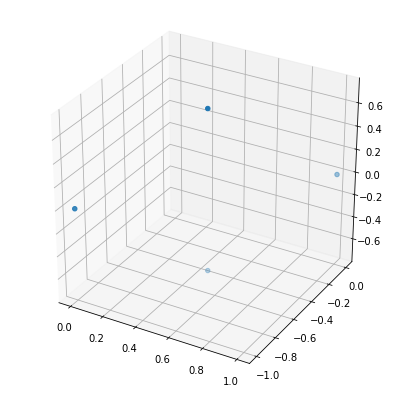

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

ax.scatter(F2[:,0], F2[:,1], F2[:,2], marker='o')

plt.show()

This looks to be a **diamond/parallelogram** 2D face

### **5c)**

In [ ]:
F3 = np.array([[0., 1., 0.], [0.5, 0.5, -0.707107], [-0.5, 0.5, -0.707107]])
print(F3.T)

[[ 0.        0.5      -0.5     ]
 [ 1.        0.5       0.5     ]
 [ 0.       -0.707107 -0.707107]]


#### **5c1)**

What is n3 = the outward normal unit vector for F3?

In [ ]:
vec1 = F3[1] - F3[0]
vec2 = F3[2] - F3[0]
n3 = np.cross(vec1, vec2)
n3

array([ 0.      ,  0.707107, -0.5     ])

#### **5c2)**

What is b3 for the linear inequality corresponding to F3, that implies all points are towards the interior of F3?  

$n_3 \cdot p <= b_3$

In [ ]:
b3 = np.dot(F3[0], n3)
b3

0.707107

#### **5c3)**

What shape is F3?

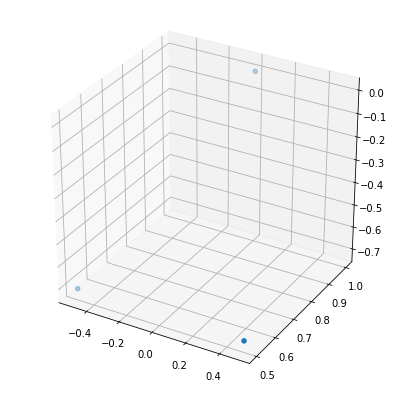

In [ ]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

ax.scatter(F3[:,0], F3[:,1], F3[:,2], marker='o')

plt.show()

This face looks like a **Triangle** plane

## **6**

Investigate the symmetries of the cuboctahedron.

### **6a)**

Find an orthogonal matrix A which maps F1 to F2.  You can use LinearSolve (or the corresponding function)

In [ ]:
A = F2.T.dot(np.linalg.pinv(F1.T))
print(A.T)

[[-5.00000000e-01 -5.00000000e-01 -7.07107000e-01]
 [-5.00000000e-01 -5.00000000e-01  7.07107000e-01]
 [-7.07106562e-01  7.07106562e-01  8.24473603e-17]]


### **6b)**

What is the smallest power k such that MatrixPower[A, k] is equal to the identity?  First try the k up to 4.   Next take into account numerical errors by finding the smallest power k where the matrix power is within .001 in Frobenius norm to the identity matrix  (the 3 by 3 diagonal matrix with 1's on the diagonal).   Explain the difference between A and A-transpose.

In [ ]:
Atra = np.linalg.matrix_power(A,1)
I = np.identity(3)
(abs(np.linalg.norm(I) - np.linalg.norm(Atra)) < 0.001)

True

The smallest k value is **1**

In [ ]:
A

array([[-5.00000000e-01, -5.00000000e-01, -7.07106562e-01],
       [-5.00000000e-01, -5.00000000e-01,  7.07106562e-01],
       [-7.07107000e-01,  7.07107000e-01,  8.24473603e-17]])

In [ ]:
A.T

array([[-5.00000000e-01, -5.00000000e-01, -7.07107000e-01],
       [-5.00000000e-01, -5.00000000e-01,  7.07107000e-01],
       [-7.07106562e-01,  7.07106562e-01,  8.24473603e-17]])

As you can see above, $A$ and $A^T$ are equivalent matrices as A is a diagnolizable matrix hence $A = A^T$

### **6c)**

Apply the matrix A to F3 on the right  (F3 dot A)   What shape is the result?  Make a picture of the points in F1, F2, F3, and F3 dot A  (labeled or colored)

In [ ]:
F3_shift = F3.dot(A)
F3_shift.shape

(3, 3)

The resulting shape is a 3x3 matrix

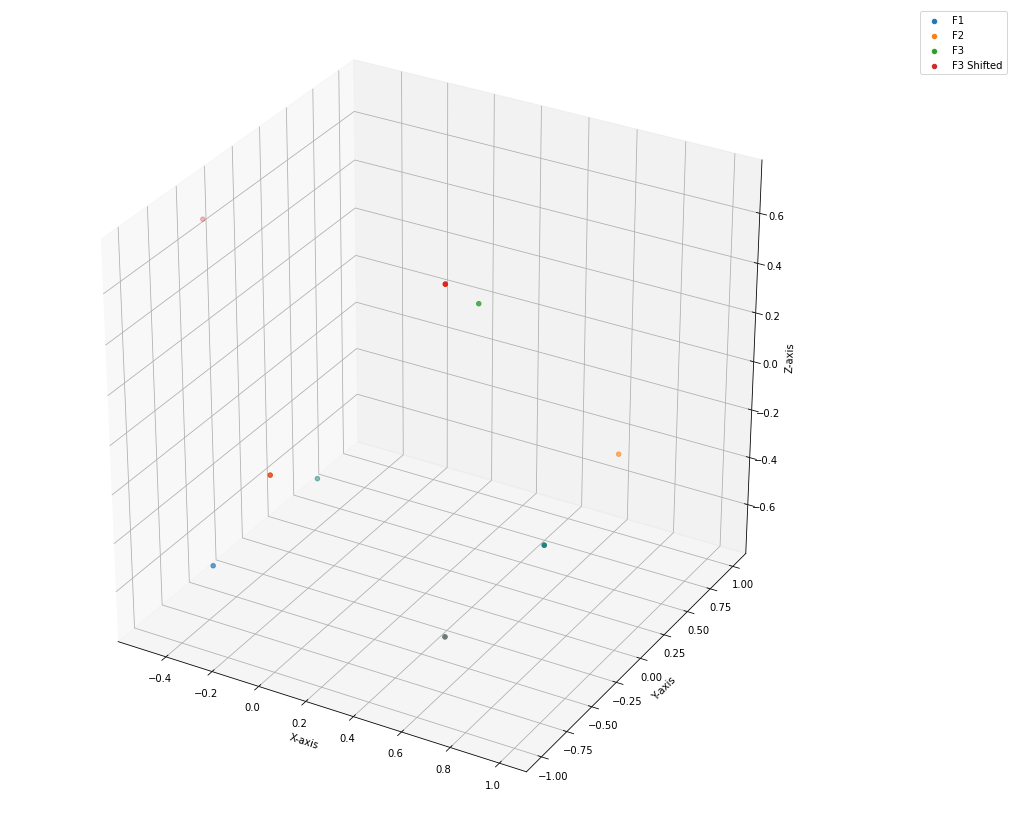

In [ ]:
mtrxs = [F1, F2, F3, F3_shift]
labeless = ['F1', 'F2', 'F3', 'F3 Shifted']
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
for i in range(len(mtrxs)):
  ax.scatter(mtrxs[i][:,0], mtrxs[i][:,1], mtrxs[i][:,2], marker='o', label=labeless[i])
  # ax.text(mtrxs[i][:,0], mtrxs[i][:,1], mtrxs[i][:,2],label=labeless[i], zdir=None)
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

### **6d**


Find the eigenvalues of A.  Find the stable eigenvector corresponding to eigenvalue 1 and show that as a line in your plot for 6c.

In [ ]:
evals, evecs = np.linalg.eig(A)
print(evals)

[ 1.+0.0000000e+00j -1.+1.2147545e-16j -1.-1.2147545e-16j]


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/axes3d.py:2588: ComplexWarning: Casting complex values to real discards the imaginary part
  UVW = np.column_stack(input_args[3:argi]).astype(float)


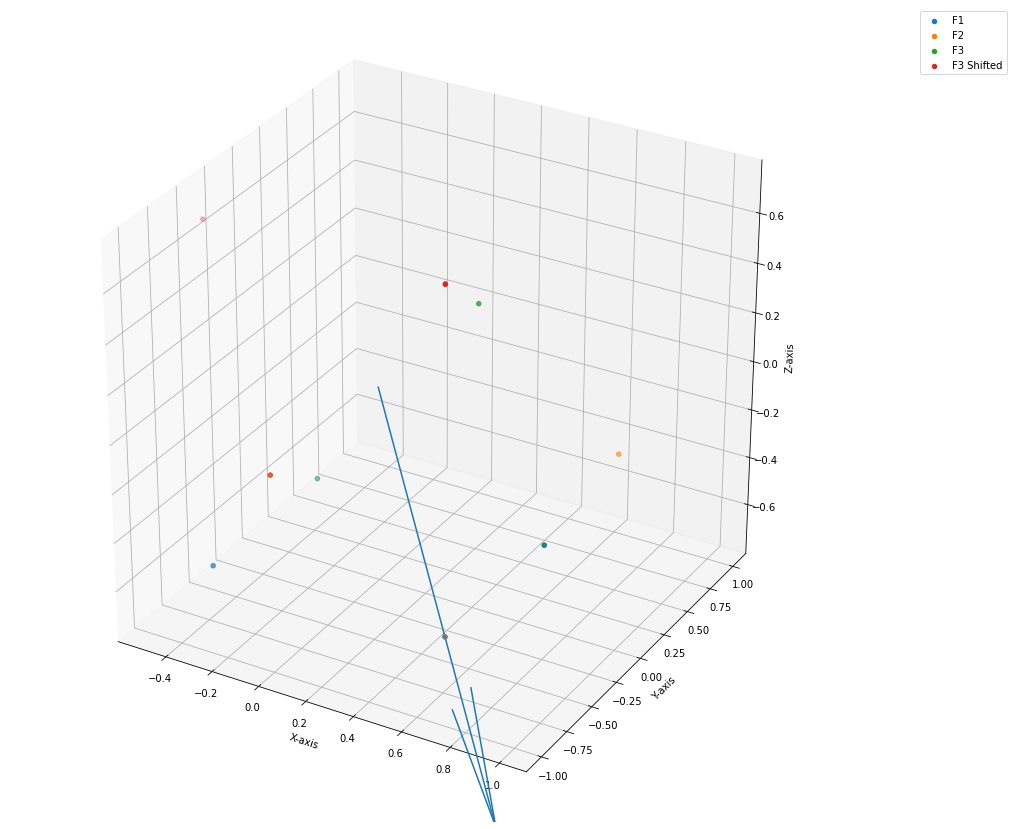

In [ ]:
eigvec1 = evecs[:,0]
origin = [0,0,0]
mtrxs = [F1, F2, F3, F3_shift]
labeless = ['F1', 'F2', 'F3', 'F3 Shifted']
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
for i in range(len(mtrxs)):
  ax.scatter(mtrxs[i][:,0], mtrxs[i][:,1], mtrxs[i][:,2], marker='o', label=labeless[i])
  # ax.text(mtrxs[i][:,0], mtrxs[i][:,1], mtrxs[i][:,2],label=labeless[i], zdir=None)
ax.quiver(*origin, *eigvec1, length=1.75)
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

### **6e**

What type of transformation is A?

In [ ]:
F3.dot(A)

array([[-5.00000000e-01, -5.00000000e-01,  7.07106562e-01],
       [ 3.09449000e-07, -1.00000031e+00, -5.82991056e-17],
       [ 5.00000309e-01, -5.00000309e-01,  7.07106562e-01]])

In [ ]:
F2

array([[ 0.5     , -0.5     ,  0.707107],
       [ 0.      , -1.      ,  0.      ],
       [ 0.5     , -0.5     , -0.707107],
       [ 1.      ,  0.      ,  0.      ]])

A transforms any hyperplane to resemble the F2 face. Hence A represents an affine transformation.